In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

# 读取数据集1

In [2]:
with open(r"D:\科学计算库\Numpy\CSV\pubg_data.xls", 'r') as f: 
    pubg_data = pd.read_csv(f, header=0, sep=',')


# 数据预处理

In [ ]:
# 数据类型转换
pubg_data[['player_kills', 'player_assists']] = pubg_data[['player_kills', 'player_assists']].astype(float)
pubg_data[['player_dbno', 'player_dmg']] = pubg_data[['player_dbno', 'player_dmg']].astype(int)

# 数据归一化
pubg_data['normalized_kills'] = (pubg_data['player_kills'] - pubg_data['player_kills'].mean()) / pubg_data[
    'player_kills'].std()
pubg_data['normalized_dbno'] = (pubg_data['player_dbno'] - pubg_data['player_dbno'].mean()) / pubg_data[
    'player_dbno'].std()
pubg_data['normalized_assists'] = (pubg_data['player_assists'] - pubg_data['player_assists'].mean()) / \
                                        pubg_data['player_assists'].std()

# 随机取10万条数据进行分析
pubg_data_sample = pubg_data.sample(n=100000)

In [3]:
pubg_data_sample_cleaned = pubg_data_sample.drop_duplicates()  # 删除重复数据
pubg_data_sample_cleaned = pubg_data_sample_cleaned.dropna()  # 删除空值或缺失值
pubg_data_sample_cleaned = pubg_data_sample_cleaned[pubg_data_sample_cleaned['player_dmg'] >= 0]  # 移除数据中伤害值为负数的行

In [4]:
q1 = pubg_data_sample_cleaned['player_dmg'].quantile(0.25)
q3 = pubg_data_sample_cleaned['player_dmg'].quantile(0.75)
iqr = q3 - q1
low_bound = q1 - 1.5 * iqr
up_bound = q3 + 1.5 * iqr
pubg_data_sample_cleaned = pubg_data_sample_cleaned[(pubg_data_sample_cleaned['player_dmg'] >= low_bound) &
(pubg_data_sample_cleaned['player_dmg'] <= up_bound)]  # 移除伤害值异常的数据

In [5]:
pubg_data_sample.head()

Unnamed: 0                      date  game_size  \
779339    12105402  2017-10-28T17:49:28+0000         93   
711951     6034874  2017-12-10T15:24:21+0000         92   
834764     2505752  2017-11-23T14:50:53+0000         27   
548324      631423  2017-11-04T16:10:25+0000         43   
210298     4704781  2017-11-09T09:16:09+0000         28   

                                                 match_id match_mode  \
779339  2U4GBNA0YmneOwO1frmaH5cVz5d9cKMR2kBJLZeKnG2qoj...        tpp   
711951  2U4GBNA0YmkU1y5tZs4Q1pwlMVgJnVthp_5MDNU_q4_rNw...        tpp   
834764  2U4GBNA0YmkVn5tINFwkW08XPZmi4tuPZxaGi_MxxgPtYP...        tpp   
548324  2U4GBNA0Ymk-NCNh4mofK48Xe2izopz1yRInxThV6zuTzI...        tpp   
210298  2U4GBNA0YmnULxJdnssntw1vYWq4lSq8Y_AAFWqHQRZmLY...        tpp   

        party_size  player_assists  player_dbno  player_dist_ride  \
779339           1             0.0            0           0.00000   
711951           1             0.0            0           0.00000   
834764           4             0.0            0           0.00000   
548324           2             1.0            1        3181.83447   
210298           4             0.0            1        5974.37451   

        player_dist_walk  player_dmg  player_kills player_name  \
779339         32.910866          54           0.0     MvpMonO   
711951        366.965271           0           0.0   ddghhjjxd   
834764        186.365112           0           0.0   Ccc199999   
548324       2889.919430         100           1.0    ZYQAQ221   
210298       3193.164310         209           0.0  Casualface   

        player_survive_time  team_id  team_placement  normalized_kills  \
779339              133.002   100082              81         -0.571373   
711951              313.618   100027              69         -0.571373   
834764              203.849       15              26         -0.571373   
548324             1345.909       39               1          0.072927   
210298             1885.390       28               2         -0.571373   

        normalized_dbno  normalized_assists  
779339        -0.522321           -0.399250  
711951        -0.522321           -0.399250  
834764        -0.522321           -0.399250  
548324         0.371950            1.334497  
210298         0.371950           -0.399250

In [6]:
#查看数据类型和数据有无缺失
pubg_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 779339 to 794462
Data columns (total 19 columns):
Unnamed: 0             100000 non-null int64
date                   100000 non-null object
game_size              100000 non-null int64
match_id               100000 non-null object
match_mode             100000 non-null object
party_size             100000 non-null int64
player_assists         100000 non-null float64
player_dbno            100000 non-null int32
player_dist_ride       100000 non-null float64
player_dist_walk       100000 non-null float64
player_dmg             100000 non-null int32
player_kills           100000 non-null float64
player_name            99856 non-null object
player_survive_time    100000 non-null float64
team_id                100000 non-null int64
team_placement         100000 non-null int64
normalized_kills       100000 non-null float64
normalized_dbno        100000 non-null float64
normalized_assists     100000 non-null float64
dtypes: fl

In [7]:
pubg_data_sample.isnull().sum().value_counts()

0      18
144     1
dtype: int64

In [8]:
null_133=pubg_data_sample.columns[pubg_data_sample.isnull().sum()==133]

print('Columns with 133 null values:',null_133)

Columns with 133 null values: Index([], dtype='object')


In [9]:
#直接删除133个缺失值的字段
pubg_data_sample.drop(columns=['player_name'],inplace=True)

In [10]:
#检查数据集中现在是否还有缺失值
pubg_data_sample.isnull().sum().value_counts()

0    18
dtype: int64

In [11]:
#查看一下有无重复数据
pubg_data_sample[pubg_data_sample.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, date, game_size, match_id, match_mode, party_size, player_assists, player_dbno, player_dist_ride, player_dist_walk, player_dmg, player_kills, player_survive_time, team_id, team_placement, normalized_kills, normalized_dbno, normalized_assists]
Index: []

In [13]:
# 统计各个特征列的取值范围和类型
for column in pubg_data_sample.columns:
    print(f'{column} 的数据类型为 {pubg_data_sample[column].dtype}，取值范围为 ({pubg_data_sample[column].min()}, {pubg_data_sample[column].max()})')

Unnamed: 0 的数据类型为 int64，取值范围为 (118, 13849207)
date 的数据类型为 object，取值范围为 (2017-10-20T08:03:59+0000, 2018-01-10T11:45:46+0000)
game_size 的数据类型为 int64，取值范围为 (9, 100)
match_id 的数据类型为 object，取值范围为 (2U4GBNA0Ymk--3atnvB2Cy2-kmfWLqeLwaiFMfmzWQFhCkWmYZiq4XKDsLngboSq, 2U4GBNA0YmnzzoelIXO2-ldPInfbKsWtcAa_HqJUD8OxpshAc2cldALmGRrHRYqW)
match_mode 的数据类型为 object，取值范围为 (tpp, tpp)
party_size 的数据类型为 int64，取值范围为 (1, 4)
player_assists 的数据类型为 float64，取值范围为 (0.0, 8.0)
player_dbno 的数据类型为 int32，取值范围为 (0, 21)
player_dist_ride 的数据类型为 float64，取值范围为 (0.0, 59294.1367)
player_dist_walk 的数据类型为 float64，取值范围为 (0.0, 782593.4)
player_dmg 的数据类型为 int32，取值范围为 (0, 3343)
player_kills 的数据类型为 float64，取值范围为 (0.0, 35.0)
player_survive_time 的数据类型为 float64，取值范围为 (58.595, 2210.606)
team_id 的数据类型为 int64，取值范围为 (1, 100110)
team_placement 的数据类型为 int64，取值范围为 (1, 100)
normalized_kills 的数据类型为 float64，取值范围为 (-0.5713730557367314, 21.97912736192045)
normalized_dbno 的数据类型为 float64，取值范围为 (-0.5223214664410178, 18.257385812617514)
normalized_assi

# 数据可视化分析

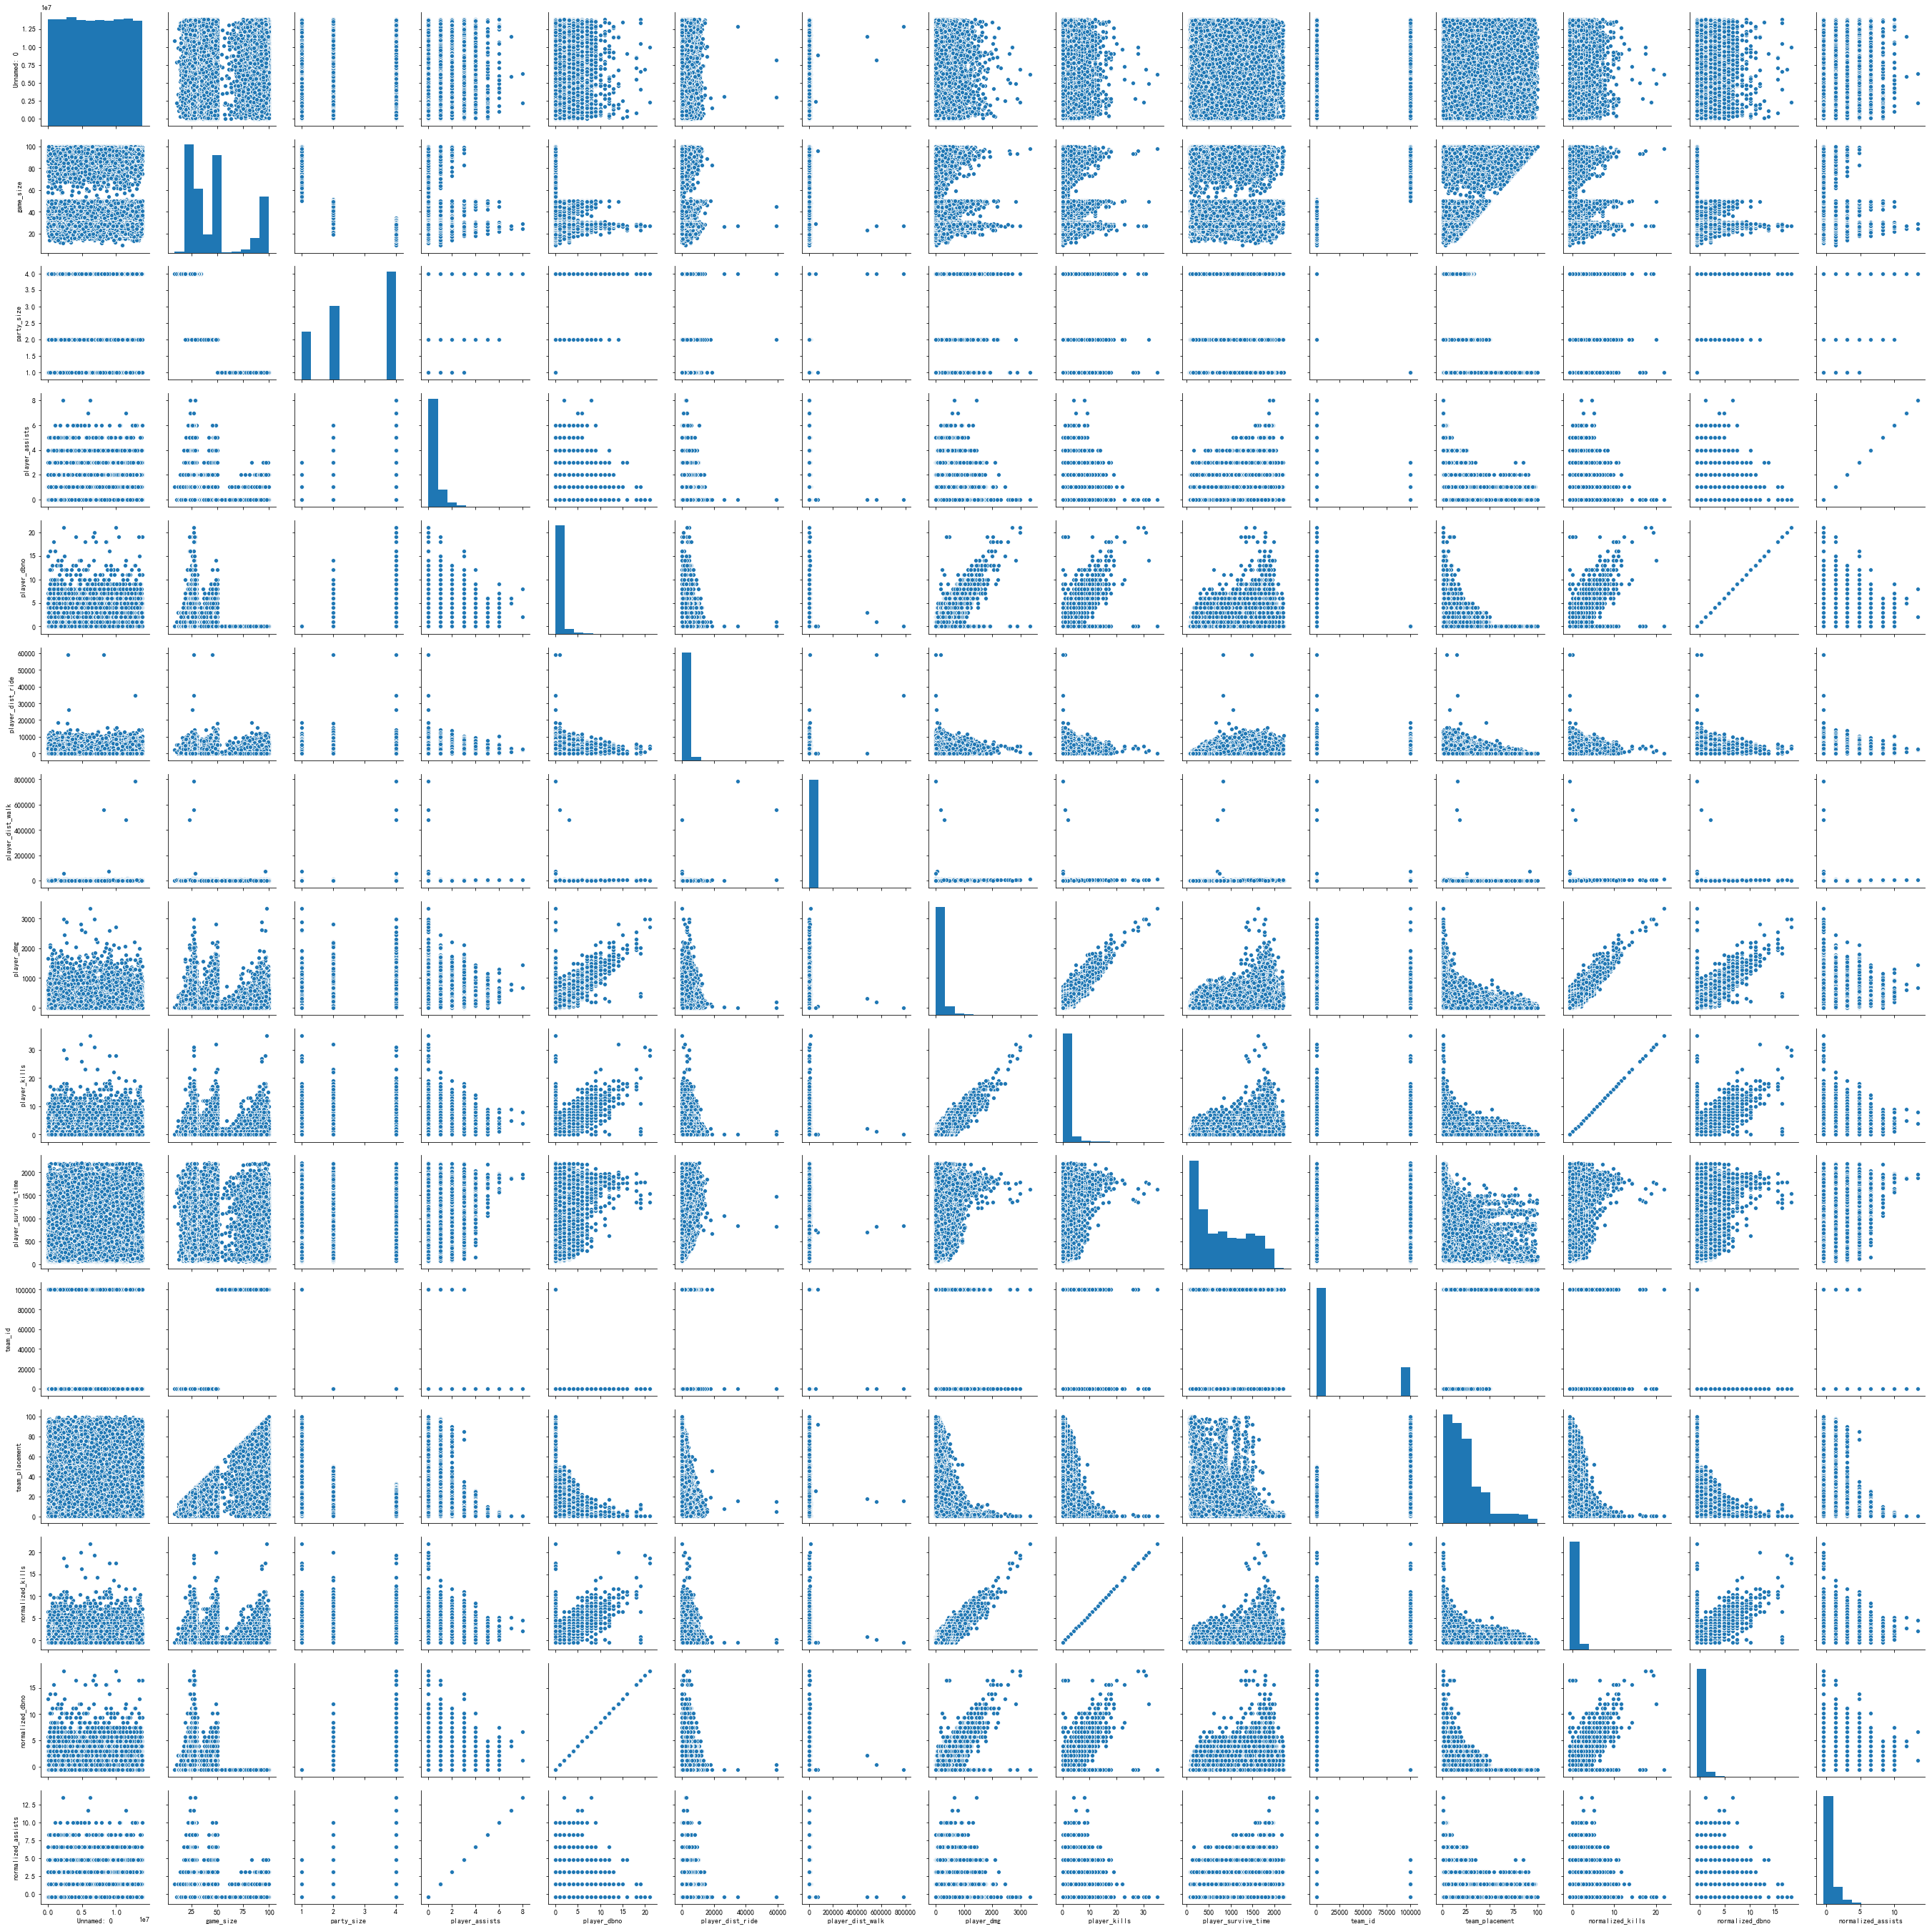

相关系数矩阵：
                      Unnamed: 0  game_size  party_size  player_assists  \
Unnamed: 0             1.000000  -0.004045    0.003531        0.001948   
game_size             -0.004045   1.000000   -0.909987       -0.161874   
party_size             0.003531  -0.909987    1.000000        0.153014   
player_assists         0.001948  -0.161874    0.153014        1.000000   
player_dbno            0.002812  -0.283462    0.261460        0.265433   
player_dist_ride       0.000103  -0.074223    0.071653        0.168605   
player_dist_walk      -0.000395  -0.025085    0.025045        0.083874   
player_dmg             0.001284  -0.033866    0.030700        0.334421   
player_kills           0.000924   0.006028   -0.006398        0.248032   
player_survive_time   -0.001630   0.001452   -0.001515       -0.000611   
team_id               -0.004729   0.923132   -0.713089       -0.149928   
team_placement        -0.003170   0.636651   -0.581106       -0.243104   
normalized_kills       0.0009

In [14]:
sns.pairplot(pubg_data_sample)#利用Seaborn的pairplot函数绘制所有特征变量之间的散点矩阵图,以观察特征之间的关系
plt.show()
corr = pubg_data.corr()
#计算全部特征的互相关系数矩阵
print('相关系数矩阵:\n', corr)
#打印相关系数矩阵,观察不同特征之间的相关程度

In [15]:
pubg_data_sample.corr()['team_placement'].sort_values()

player_survive_time   -0.643791
party_size            -0.584114
player_dist_ride      -0.401538
player_dmg            -0.308715
player_dbno           -0.297040
normalized_dbno       -0.297040
normalized_kills      -0.272124
player_kills          -0.272124
player_assists        -0.244451
normalized_assists    -0.244451
player_dist_walk      -0.197206
Unnamed: 0             0.003281
team_id                0.592688
game_size              0.641148
team_placement         1.000000
Name: team_placement, dtype: float64

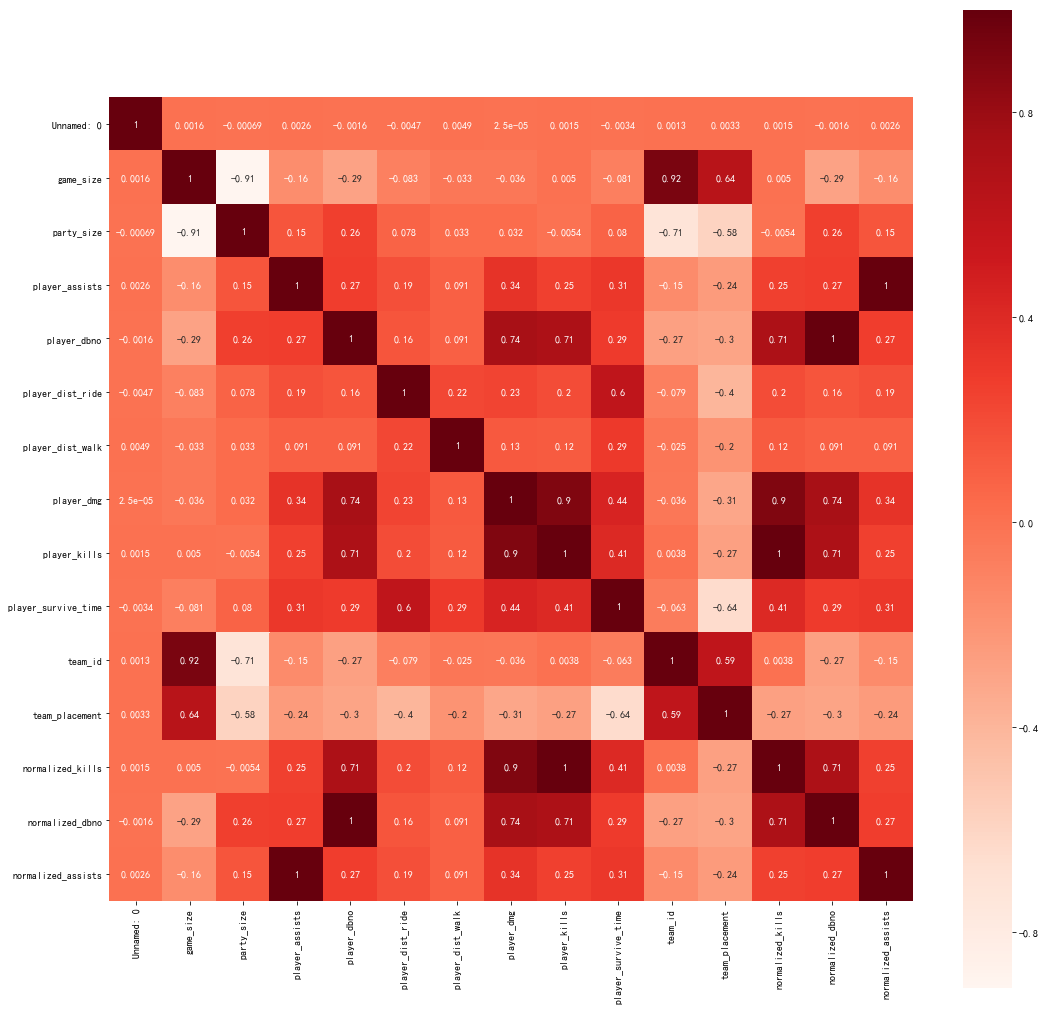

In [16]:
dfData = pubg_data_sample.corr()
plt.subplots(figsize=(18, 18)) # 设置画面大小
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Reds")
plt.show()

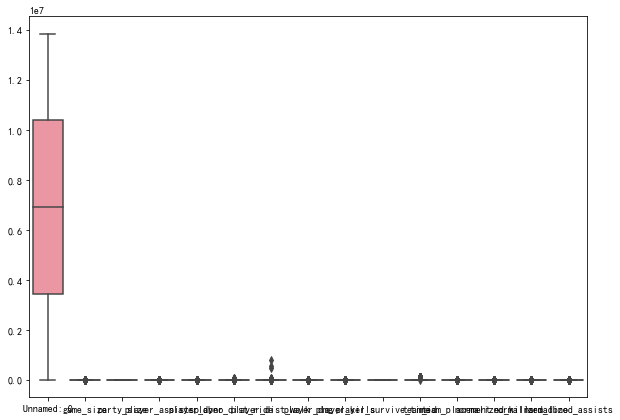

In [43]:
# 绘制盒图
plt.figure(figsize=(10,7))
sns.boxplot(data=pubg_data_sample)

In [12]:
#查看数据的描述统计
pubg_data_sample.describe()

Unnamed: 0      game_size     party_size  player_assists  \
count  1.000000e+05  100000.000000  100000.000000    100000.00000   
mean   6.916880e+06      47.140790       2.732860         0.23161   
std    3.998110e+06      25.157808       1.245958         0.58228   
min    1.180000e+02       9.000000       1.000000         0.00000   
25%    3.447644e+06      27.000000       2.000000         0.00000   
50%    6.910742e+06      43.000000       2.000000         0.00000   
75%    1.040269e+07      50.000000       4.000000         0.00000   
max    1.384921e+07     100.000000       4.000000         8.00000   

         player_dbno  player_dist_ride  player_dist_walk     player_dmg  \
count  100000.000000     100000.000000     100000.000000  100000.000000   
mean        0.587280       1160.021708       1276.124949     123.902210   
std         1.117593       1915.125759       3616.109456     168.588583   
min         0.000000          0.000000          0.000000       0.000000   
25%         0.000000          0.000000        211.978382       0.000000   
50%         0.000000          0.000000        850.977734      77.000000   
75%         1.000000       1903.396415       2055.731020     175.000000   
max        21.000000      59294.136700     782593.400000    3343.000000   

        player_kills  player_survive_time       team_id  team_placement  \
count  100000.000000        100000.000000  100000.00000   100000.000000   
mean        0.884150           787.549263   20817.27986       24.483470   
std         1.544938           576.546922   40594.39828       20.393684   
min         0.000000            58.595000       1.00000        1.000000   
25%         0.000000           247.783000      11.00000       10.000000   
50%         0.000000           654.064000      22.00000       20.000000   
75%         1.000000          1298.692000      44.00000       32.000000   
max        35.000000          2210.606000  100110.00000      100.000000   

       normalized_kills  normalized_dbno  normalized_assists  
count     100000.000000    100000.000000       100000.000000  
mean          -0.001715         0.002866            0.002303  
std            0.995403         0.999432            1.009526  
min           -0.571373        -0.522321           -0.399250  
25%           -0.571373        -0.522321           -0.399250  
50%           -0.571373        -0.522321           -0.399250  
75%            0.072927         0.371950           -0.399250  
max           21.979127        18.257386           13.470725

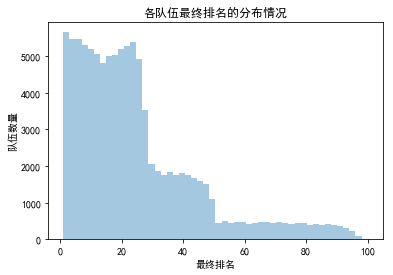

In [17]:
# 统计各队伍最终排名的分布情况
sns.distplot(pubg_data_sample['team_placement'], bins=50, kde=False)
plt.title('各队伍最终排名的分布情况')
plt.xlabel('最终排名')
plt.ylabel('队伍数量')
plt.show()

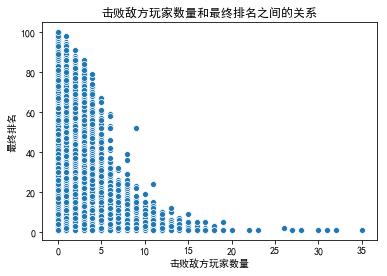

In [18]:
# 查看玩家击败敌方玩家数量和最终排名之间的关系
sns.scatterplot(x='player_kills', y='team_placement', data=pubg_data_sample)
plt.title('击败敌方玩家数量和最终排名之间的关系')
plt.xlabel('击败敌方玩家数量')
plt.ylabel('最终排名')
plt.show()

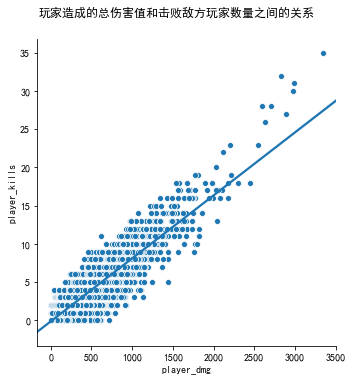

In [19]:
g = sns.relplot(x='player_dmg', y='player_kills', data=pubg_data_sample, kind='scatter')

g.fig.suptitle('玩家造成的总伤害值和击败敌方玩家数量之间的关系', y=1.05)
g.set_axis_labels("造成的总伤害值", "击败敌方玩家数量")
sns.regplot(x='player_dmg', y='player_kills', data=pubg_data_sample, scatter=False, ax=g.ax)

plt.show()


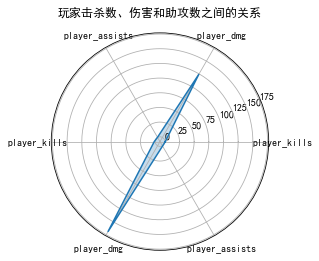

In [39]:
# 构造数据
cols = ['player_kills', 'player_dmg', 'player_assists']
data = pubg_data_sample[cols].mean().tolist() + pubg_data_sample[cols].std().tolist()
labels = cols * 2
angles = np.array([n / float(len(labels)) * 2 * np.pi for n in range(len(labels))])
angles = np.concatenate((angles, [angles[0]]))
data += data[:1]

# 绘制蜘蛛图
ax = plt.subplot(111, polar=True)
ax.plot(angles, data)
ax.fill(angles, data, alpha=0.25)
ax.set_thetagrids(angles[:-1] * 180/3.1415926, labels)
ax.set_title('玩家击杀数、伤害和助攻数之间的关系')
plt.show()

In [20]:
# 读取数据集2
with open(r"D:\科学计算库\Numpy\CSV\pubg_data2.xls", 'r') as f:
    pubg_data_2 = pd.read_csv(f, header=0, sep=',')

# 随机取10万条数据进行分析
pubg_data_2_sample = pubg_data_2.sample(n=100000)

In [21]:
pubg_data_2_sample.head()

Unnamed: 0 killed_by     killer_name  killer_placement  \
212359      161148       AKM       reedchoco              37.0   
452910    13353098       AKM         woif918               9.0   
331399    10468365      UMP9   aiyqyqiaoyuan               2.0   
402003     4855055    SCAR-L  cnimabilandong               3.0   
421875    13229962   Mini 14          HY-520              11.0   

        killer_position_x  killer_position_y      map  \
212359           428580.9           448862.2  ERANGEL   
452910           488378.5           458210.8  ERANGEL   
331399           461681.9           633870.2  ERANGEL   
402003           694152.7           503038.7      NaN   
421875           552734.4           537317.7  ERANGEL   

                                                 match_id  time  victim_name  \
212359  2U4GBNA0YmkjIDC2epFmQawNsjptFNx62uEOa3kzUFToBe...   236         YSE1   
452910  2U4GBNA0Ymk_kZGP91WnYO35Z5hGDs8dTV8HEyzDf9FAsF...   381  WOZUIBANGYA   
331399  2U4GBNA0Yml7ThtZEqzH5DhROfrzX6S1D2WIRGetj7MJGg...   282   IMADDADDYI   
402003  2U4GBNA0YmlzT_6UVo-7zFBYPRC6nu7lJPAm2mS2dlpY1i...  1269      ruszani   
421875  2U4GBNA0YmlbgkVFHJUF74A5iyVoLPvFRkF8n_x0NR-qmo...   963      lxxbang   

        victim_placement  victim_position_x  victim_position_y  
212359              71.0           434775.7           449503.5  
452910              56.0           488634.5           455948.8  
331399              16.0           460909.3           634378.3  
402003              10.0           697511.0           505694.3  
421875              33.0           551416.3           561299.8

In [22]:
#查看数据类型和数据有无缺失
pubg_data_2_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 212359 to 170504
Data columns (total 13 columns):
Unnamed: 0           100000 non-null int64
killed_by            100000 non-null object
killer_name          92944 non-null object
killer_placement     92944 non-null float64
killer_position_x    92944 non-null float64
killer_position_y    92944 non-null float64
map                  98774 non-null object
match_id             100000 non-null object
time                 100000 non-null int64
victim_name          100000 non-null object
victim_placement     98085 non-null float64
victim_position_x    100000 non-null float64
victim_position_y    100000 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 10.7+ MB


In [23]:
pubg_data_2_sample.isnull().sum().value_counts()

0       7
7056    4
1915    1
1226    1
dtype: int64

In [24]:
null_6844=pubg_data_2_sample.columns[pubg_data_2_sample.isnull().sum()==6844]

print('Columns with 6844 null values:',null_6844)

null_1832=pubg_data_2_sample.columns[pubg_data_2_sample.isnull().sum()==1832]

print('Columns with 1832 null values:',null_1832)
null_1236=pubg_data_2_sample.columns[pubg_data_2_sample.isnull().sum()==1236]

print('Columns with 1236 null values:',null_1236)

Columns with 6844 null values: Index([], dtype='object')
Columns with 1832 null values: Index([], dtype='object')
Columns with 1236 null values: Index([], dtype='object')


In [25]:
#填充缺失值
pubg_data_2_sample['killer_name'].fillna('unknown', inplace=True)
pubg_data_2_sample['killer_placement'].fillna('unknown', inplace=True)
pubg_data_2_sample['killer_position_x'].fillna('unknown', inplace=True)
pubg_data_2_sample['killer_position_y'].fillna('unknown', inplace=True)
pubg_data_2_sample['victim_placement'].fillna('unknown', inplace=True)
pubg_data_2_sample['map'].fillna('unknown', inplace=True)


In [26]:
#检查数据集中现在是否还有缺失值
pubg_data_sample.isnull().sum().value_counts()

0    18
dtype: int64

In [27]:
#查看一下有无重复数据
pubg_data_2_sample[pubg_data_2_sample.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, killed_by, killer_name, killer_placement, killer_position_x, killer_position_y, map, match_id, time, victim_name, victim_placement, victim_position_x, victim_position_y]
Index: []

In [28]:
# 创建一个 LabelEncoder 对象
le = LabelEncoder()

# 将所有文本变量进行转换
pubg_data_2_sample['killed_by'] = le.fit_transform(pubg_data_2_sample['killed_by'])
pubg_data_2_sample['killer_name'] = le.fit_transform(pubg_data_2_sample['killer_name'])
pubg_data_2_sample['map'] = le.fit_transform(pubg_data_2_sample['map'])
pubg_data_2_sample['match_id'] = le.fit_transform(pubg_data_2_sample['match_id'])
pubg_data_2_sample['time'] = le.fit_transform(pubg_data_2_sample['time'])
pubg_data_2_sample['victim_name'] = le.fit_transform(pubg_data_2_sample['victim_name'])

# 查看转换后的结果
print(pubg_data_2_sample.head())

        Unnamed: 0  killed_by  killer_name killer_placement killer_position_x  \
212359      161148          0        78265               37            428581   
452910    13353098          0        83295                9            488378   
331399    10468365         43        61737                2            461682   
402003     4855055         39        64787                3            694153   
421875    13229962         23        23198               11            552734   

       killer_position_y  map  match_id  time  victim_name victim_placement  \
212359            448862    0     13507   175        62719               71   
452910            458211    0     10819   320        59615               56   
331399            633870    0     20640   221        27092               16   
402003            503039    2     36267  1208        85262               10   
421875            537318    0     29495   902        80437               33   

        victim_position_x  victim_posi

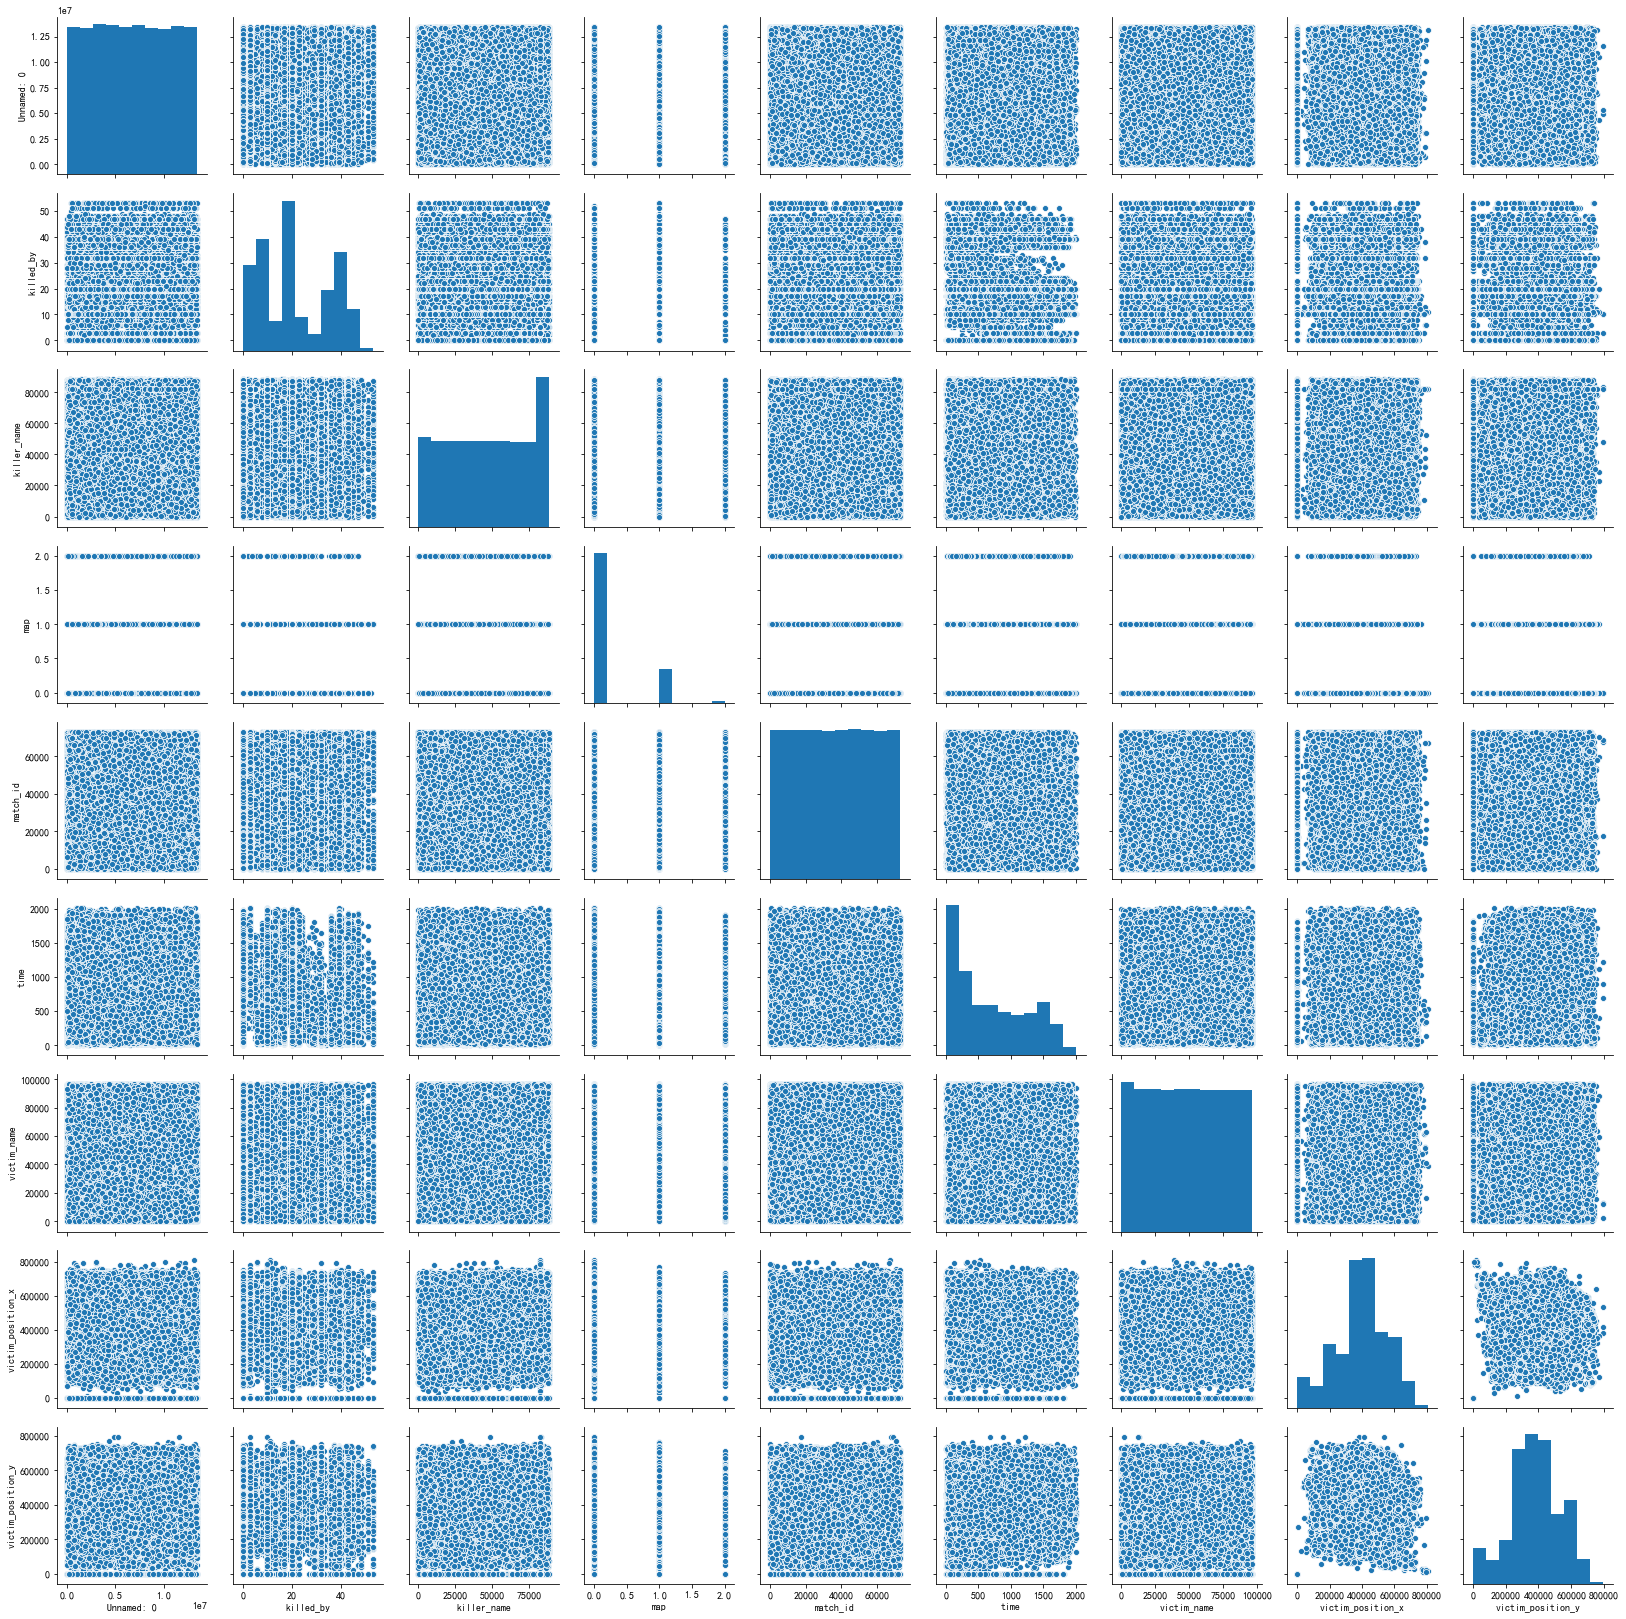

相关系数矩阵：
                    Unnamed: 0  killed_by  killer_name       map  match_id  \
Unnamed: 0           1.000000  -0.004978     0.002591 -0.001503 -0.004263   
killed_by           -0.004978   1.000000    -0.115597  0.010403  0.004915   
killer_name          0.002591  -0.115597     1.000000 -0.000954  0.005346   
map                 -0.001503   0.010403    -0.000954  1.000000 -0.002750   
match_id            -0.004263   0.004915     0.005346 -0.002750  1.000000   
time                -0.000728  -0.246457     0.069480 -0.015309  0.002274   
victim_name          0.004380  -0.002121     0.019895  0.010458 -0.002076   
victim_position_x    0.003517   0.060964    -0.084680 -0.029433 -0.000392   
victim_position_y    0.000953   0.058455    -0.079506 -0.028618 -0.003757   

                       time  victim_name  victim_position_x  victim_position_y  
Unnamed: 0        -0.000728     0.004380           0.003517           0.000953  
killed_by         -0.246457    -0.002121           0.06096

In [30]:
sns.pairplot(pubg_data_2_sample)
plt.show()
corr = pubg_data_2_sample.corr()
print('相关系数矩阵：\n', corr)

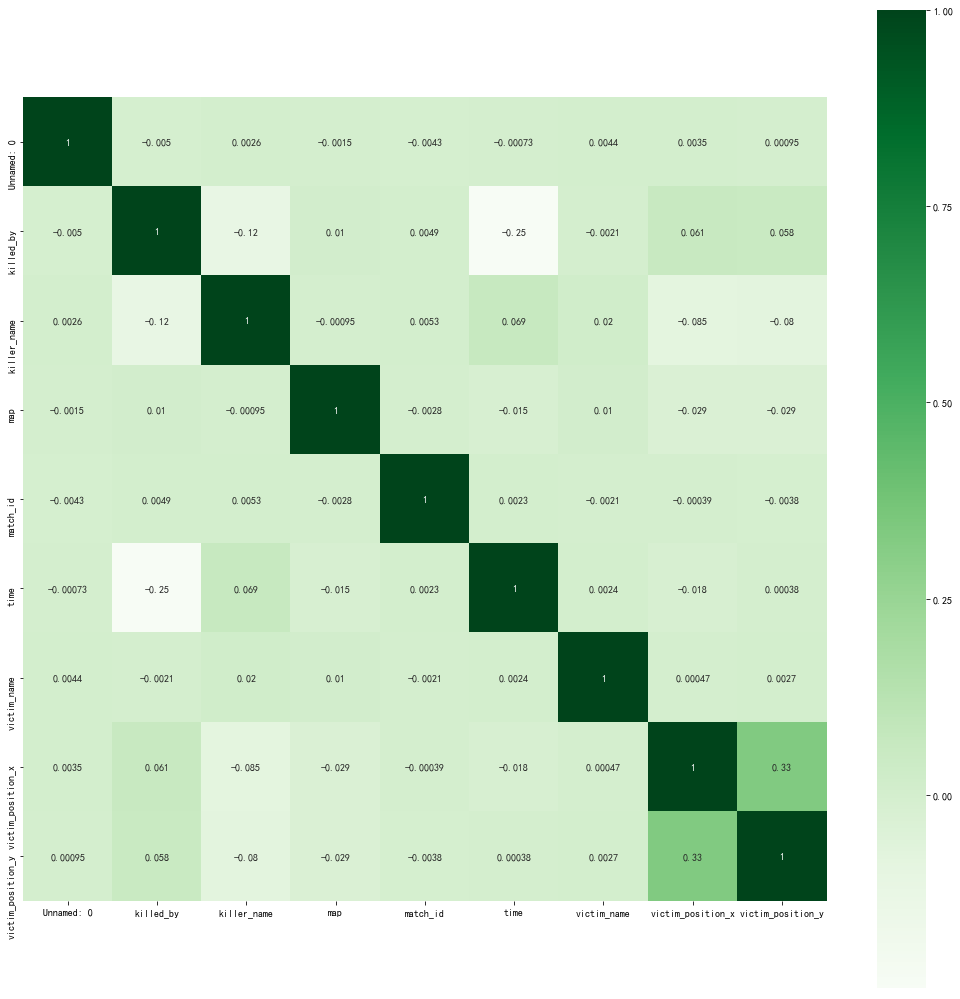

In [31]:
dfData = pubg_data_2_sample.corr()
plt.subplots(figsize=(18, 18)) # 设置画面大小
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Greens")
plt.show()

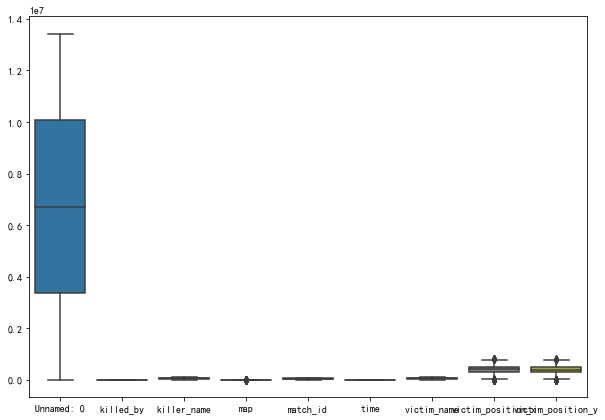

In [40]:
# 绘制盒图
plt.figure(figsize=(10,7))
sns.boxplot(data=pubg_data_2_sample)

In [29]:
#查看数据的描述统计
pubg_data_2_sample.describe()

Unnamed: 0      killed_by    killer_name            map  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   6.703122e+06      21.426770   46508.898770       0.205260   
std    3.876038e+06      13.833659   26492.346461       0.433186   
min    1.240000e+02       0.000000       0.000000       0.000000   
25%    3.344530e+06      10.000000   23370.750000       0.000000   
50%    6.689930e+06      20.000000   47129.500000       0.000000   
75%    1.006928e+07      37.000000   70993.250000       0.000000   
max    1.342629e+07      53.000000   88199.000000       2.000000   

            match_id           time    victim_name  victim_position_x  \
count  100000.000000  100000.000000  100000.000000      100000.000000   
mean    36472.730050     701.217080   47877.497830      394815.201957   
std     21043.128766     557.139337   27963.179855      161953.209084   
min         0.000000       0.000000       0.000000           0.000000   
25%     18222.000000     182.000000   23641.750000      313091.325000   
50%     36493.500000     567.000000   47828.500000      406565.300000   
75%     54683.250000    1192.000000   72095.250000      500769.100000   
max     72923.000000    2008.000000   96418.000000      806531.000000   

       victim_position_y  
count      100000.000000  
mean       379293.796821  
std        157698.009634  
min             0.000000  
25%        288113.075000  
50%        379327.100000  
75%        478864.150000  
max        796210.900000

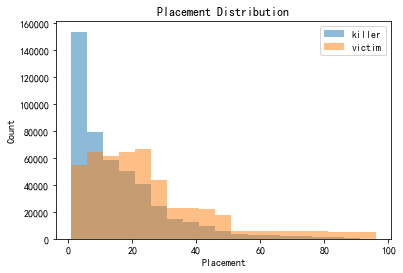

In [32]:
# 分别查看杀手和受害者在比赛中的排名
killer_placement = pubg_data_2_sample['killer_placement']
victim_placement = pubg_data_2_sample['victim_placement']

# 绘制直方图
bins = [i for i in range(1, 101, 5)]
plt.hist(killer_placement, bins=bins, alpha=0.5, label='killer')
plt.hist(victim_placement, bins=bins, alpha=0.5, label='victim')
plt.xlabel('Placement')
plt.ylabel('Count')
plt.title('Placement Distribution')
plt.legend()
plt.show()


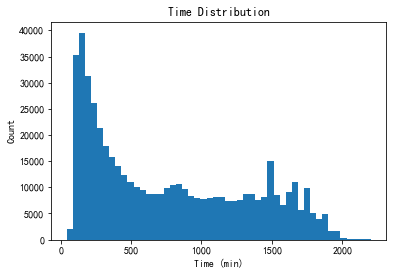

In [33]:
# 查看击杀事件发生时间的分布
time = pubg_data_2_sample['time']

# 绘制直方图
plt.hist(time, bins=50)
plt.xlabel('Time (min)')
plt.ylabel('Count')
plt.title('Time Distribution')
plt.show()


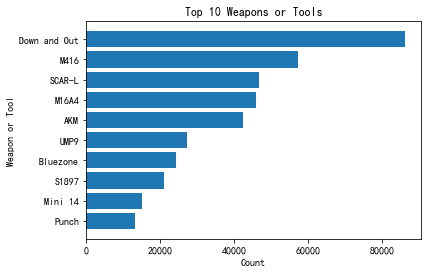

In [34]:
# 统计被用于击杀的武器或工具的数量
weapon_counts = pubg_data_2_sample['killed_by'].value_counts()

# 取前10个
top_weapon_counts = weapon_counts[:10]

# 绘制水平条形图
plt.barh(top_weapon_counts.index, top_weapon_counts.values)
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Weapon or Tool')
plt.title('Top 10 Weapons or Tools')
plt.show()


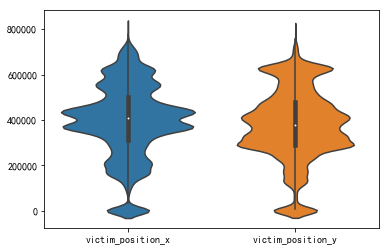

In [42]:
# 选取需要分析的特征列
cols = ['killer_placement', 'victim_placement', 'killer_position_x', 'killer_position_y', 'victim_position_x', 'victim_position_y']

# 绘制小提琴图
sns.violinplot(data=pubg_data_2_sample[cols])